# ANÁLISIS TOL

Cargo paquetes

In [146]:
import os
import numpy as np
import pandas as pd
import mne
#from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs


Cargo datos de prueba

In [210]:
epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")



Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Fede\AppData\Local\Temp\ipykernel_15424\1005253550.py:1: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


In [211]:


epochs.metadata



Acá lo que hago es convertir el epochs en df para poder modificar la condición. Sin embargo, no puedo volver a convertirlo en epochs. Deberia encontrar una forma de trabjar directamente sobre el objeto epochs sin convertirlo

In [212]:
df = epochs.to_data_frame()


Genero un diccionario que me empareja número de ensayo con tipo de ensayo

Ahora, le agrego la información del tipo de ensayo al objeto epochs. 
Como, por algún motivo, el primer ensayo no quedó grabado, le paso todos los tipos de ensayo menos los del primer ensayo

In [213]:
goal_hierarchy = ["tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "tower", "tower",
"tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "plane", "tower",
"tower", "plane", "tower", "tower", "tower",
"tower", "tower", "plane", "plane", "plane",
"tower", "plane", "plane", "tower", "plane",
"tower", "tower", "tower", "tower", "tower",
"tower", "plane", "tower", "tower", "tower",
"plane", "tower", "tower"]


df = pd.DataFrame (
    goal_hierarchy[1:],   
    columns= ["goal_hierarchy"])



In [214]:
epochs.metadata = df
epochs.metadata.head()

Adding metadata with 1 columns


,goal_hierarchy
0,tower
1,tower
2,tower
3,tower
4,plane


In [215]:
print(epochs['goal_hierarchy.str.startswith("tower")'])
print(epochs['goal_hierarchy.str.startswith("plane")'])

print(epochs['goal_hierarchy =="tower"'])
print(epochs['goal_hierarchy =="plane"'])

<EpochsFIF |  35 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~62.3 MB, data loaded, with metadata,
 '1': 35>
<EpochsFIF |  12 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~21.4 MB, data loaded, with metadata,
 '1': 12>
<EpochsFIF |  35 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~62.3 MB, data loaded, with metadata,
 '1': 35>
<EpochsFIF |  12 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~21.4 MB, data loaded, with metadata,
 '1': 12>


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Fede\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


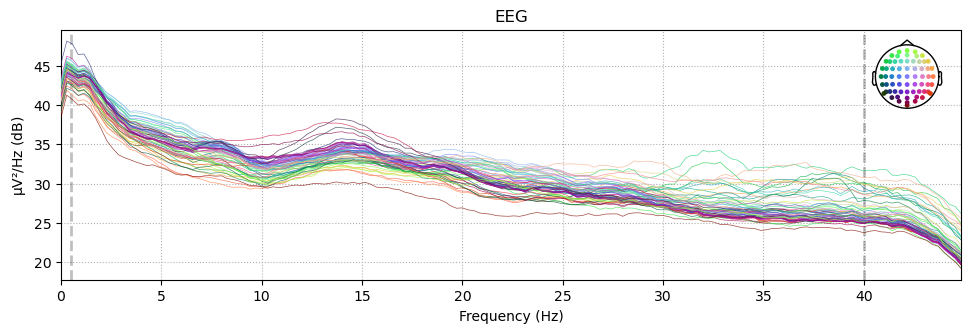

In [216]:
epochs['goal_hierarchy == "tower"'].compute_psd(fmax = 45).plot(picks="data", exclude="bads", amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Fede\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


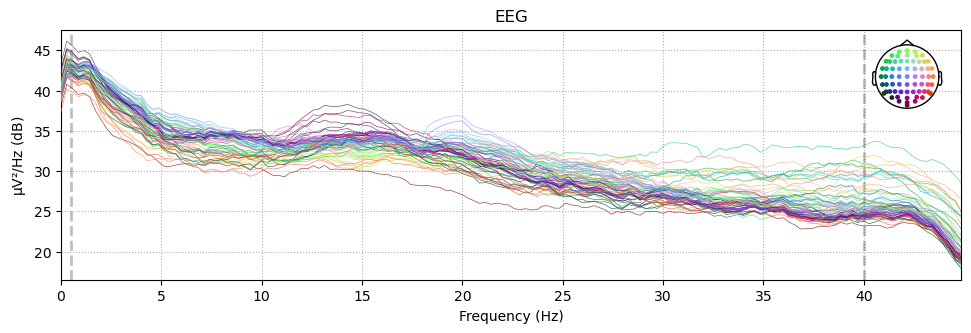

In [217]:
epochs['goal_hierarchy == "plane"'].compute_psd(fmax = 45).plot(picks="data", exclude="bads", amplitude=False)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated


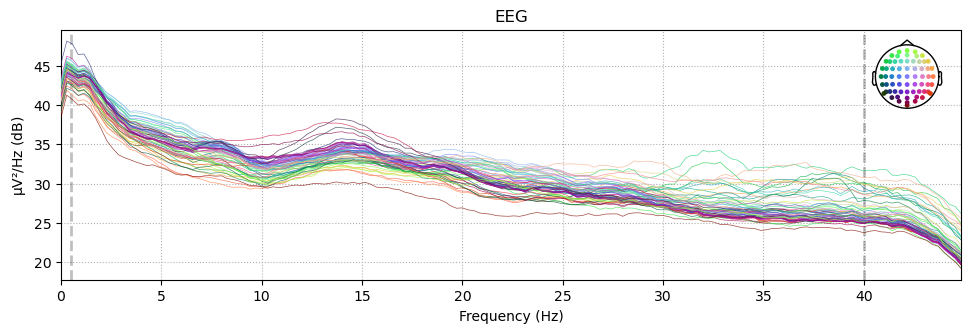

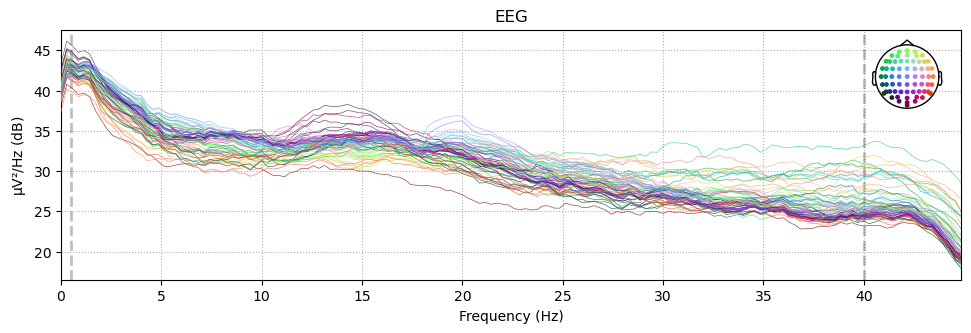

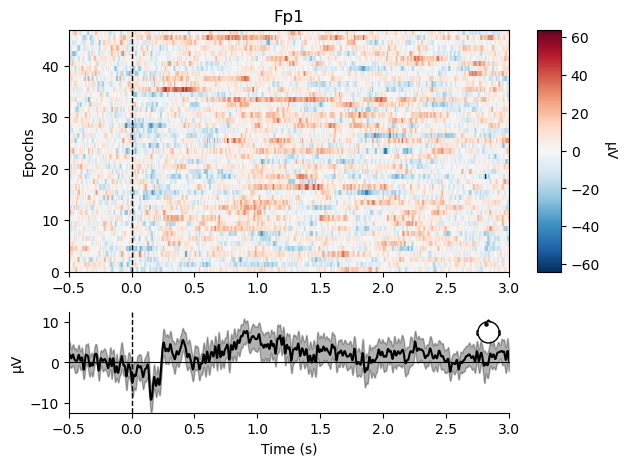

[<Figure size 640x480 with 4 Axes>]

In [218]:
sort_order = np.argsort(epochs.metadata["goal_hierarchy"])
epochs.plot_image(order=sort_order, picks="Fp1")

In [219]:
epochs.metadata["goal_hierarchy"].unique()

array(['tower', 'plane'], dtype=object)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


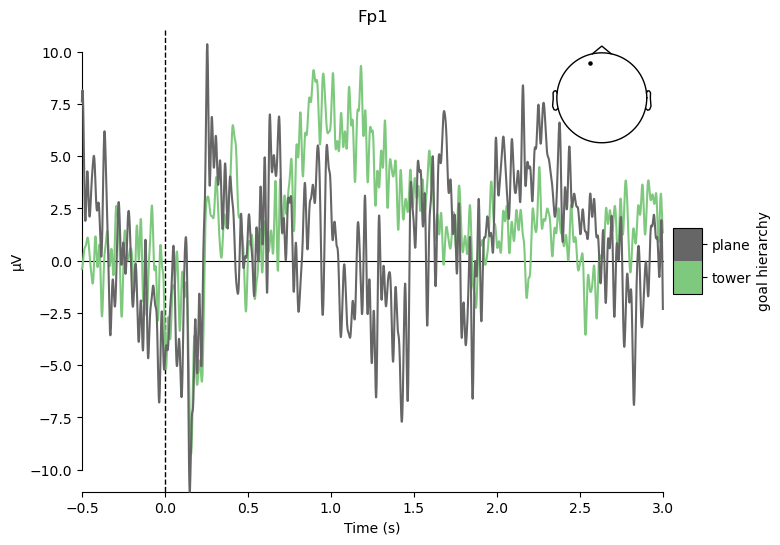

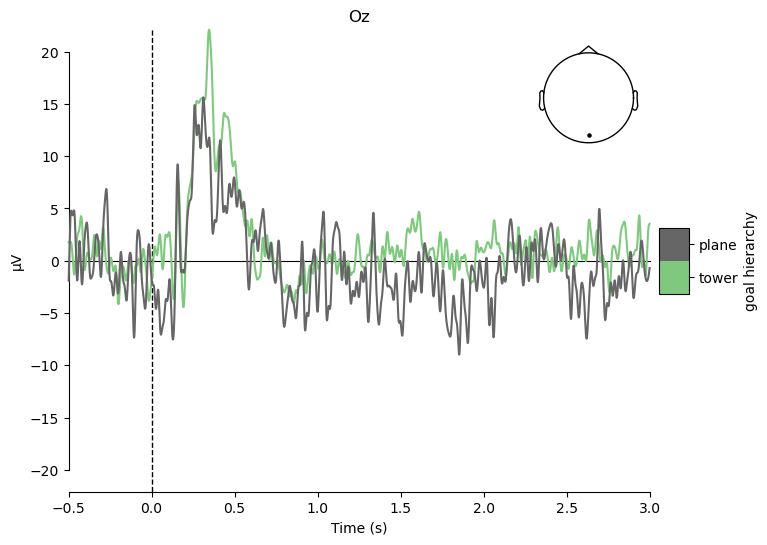

[<Figure size 800x600 with 3 Axes>]

In [245]:

from pathlib import Path
evokeds = dict()
query = "goal_hierarchy == '{}'"
for hierarchies in epochs.metadata["goal_hierarchy"].unique():
    evokeds[str(hierarchies)] = epochs[query.format(hierarchies)].average()

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Fp1')

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Oz')



In [246]:
from mne.time_frequency import tfr_morlet

evoked = epochs.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [247]:
freqs = list(range(3,30))
tfr_epochs = tfr_morlet(epochs, freqs, 1.5, return_itc = False)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.7s


KeyboardInterrupt: 

In [248]:
epochs_tower = epochs['goal_hierarchy == "tower"']

# Get the indices of all epochs
all_indices = np.arange(len(epochs_tower))

# Select 12 random indices
random_indices = np.random.choice(all_indices, size=12, replace=False)

# Select the random epochs
random_epochs_tower = epochs_tower[random_indices]



random_epochs_tower


epochs_plane= epochs['goal_hierarchy == "plane"']

Acá corro el un morlet para cada condición. está bien eso?

In [249]:
freqs = list(range(2,30))
tfr_epochs_tower = tfr_morlet(random_epochs_tower, freqs, 1, return_itc = False)
tfr_epochs_plane = tfr_morlet(epochs_plane, freqs, 1, return_itc = False)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


In [250]:
tfr_epochs_tower.apply_baseline(baseline=(-0.5, -0.2))
tfr_epochs_plane.apply_baseline(baseline=(-0.5, -0.2))

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.500000, 3.000000], freq : [2.000000, 29.000000], nave : 12, channels : 64, ~49.1 MB>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


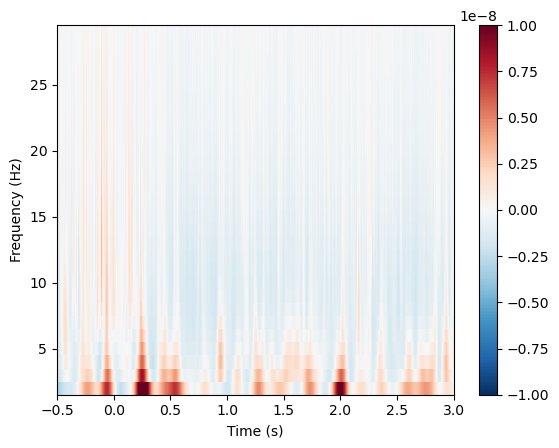

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


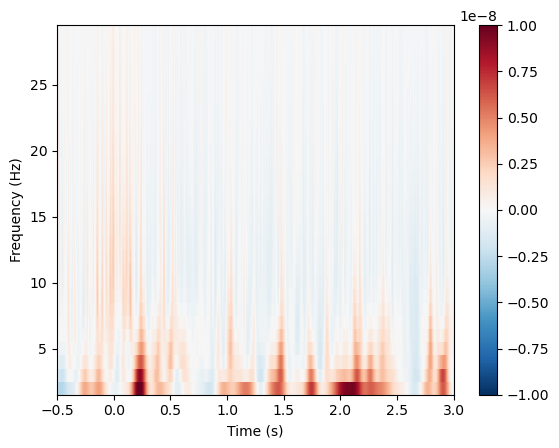

[<Figure size 640x480 with 2 Axes>]

In [251]:
tfr_epochs_tower.plot(picks = "Fp1", vmax=1e-8*1, vmin = 1e-8*-1)
tfr_epochs_plane.plot(picks = "Fp1", vmax=1e-8*1, vmin = 1e-8*-1)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


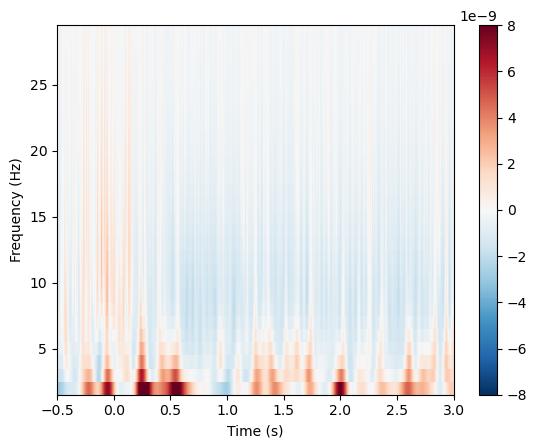

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


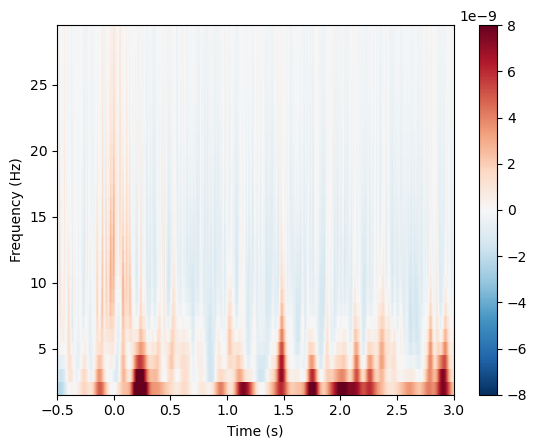

[<Figure size 640x480 with 2 Axes>]

In [252]:
tfr_epochs_tower.plot(picks = "Fpz", vmax=1e-9*8, vmin = 1e-9*-8)
tfr_epochs_plane.plot(picks = "Fpz", vmax=1e-9*8, vmin = 1e-9*-8)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


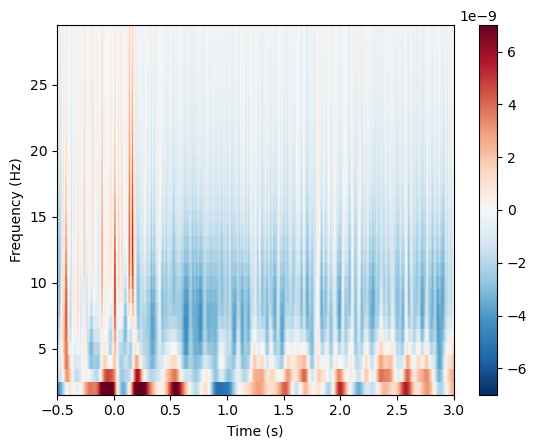

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


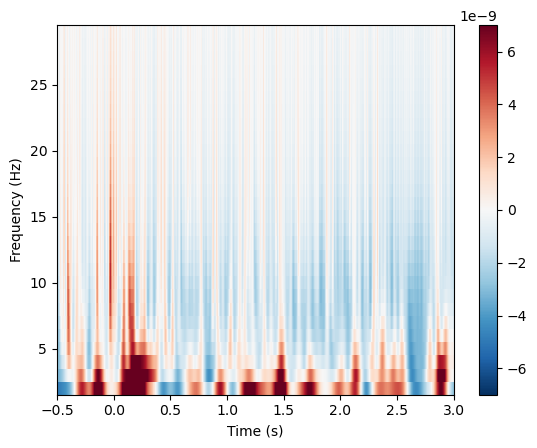

[<Figure size 640x480 with 2 Axes>]

In [253]:
tfr_epochs_tower.plot(picks = "Cz", vmax=1e-9*7, vmin = 1e-9*-7)
tfr_epochs_plane.plot(picks = "Cz", vmax=1e-9*7, vmin = 1e-9*-7)